What would you like to know about today, luv?
NIH


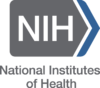

NIH is the primary agency of the United States government responsible for biomedical and public health research, founded in the late 1870s....beautiful indeed


In [29]:
# "Explain me like I'm Five BEAUTIFUL DICTIONARY"
# generates a quick fact sheet from Wiki database based on user's query

import requests
from bs4 import BeautifulSoup
import re
from IPython.core.display import Image, display

print('What would you like to know about today, luv?')
query = str(input())

response = requests.get("https://en.wikipedia.org/wiki/"+ query ) # generating a link
txt = response.content

soup = BeautifulSoup(txt,'lxml')
for imgtag in soup('img'): # parsing html for any first image
    link = 'http:' + imgtag['src']
    display(Image(link)) #doesn't work very well, but I couldn't come up with a good rule here
    break

fact_sheet = soup.p.get_text()
key_fact = re.split(r'(?<=[^A-Z].[.?]) +(?=[A-Z])', fact_sheet)
for i in key_fact:
    search = re.findall("is.([^\>]*)", i) #parsing html for the first sentence with IS key word
    if search != []:
        print(query + ' is' + ' ' + str(search[0]) + '...beautiful indeed')
        break
    else:
        print('Sorry! Have no idea. Is it something beautiful?')
